In [1]:
import cv2
import matplotlib.pyplot as plt


(np.float64(-0.5), np.float64(2666.5), np.float64(3999.5), np.float64(-0.5))

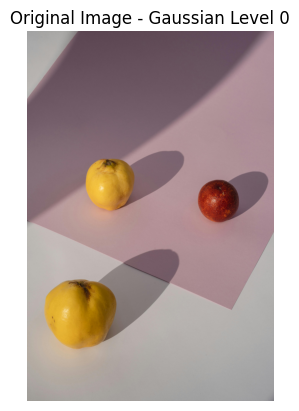

In [3]:
img = cv2.imread("images.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Original Image - Gaussian Level 0")
plt.axis("off")


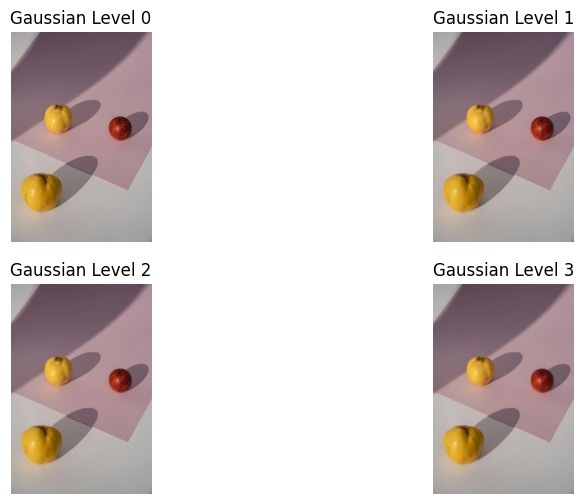

In [4]:
G = [img]
for i in range(3):
    G.append(cv2.pyrDown(G[i]))
plt.figure(figsize=(10,6))
for i in range(len(G)):
    plt.subplot(2,2,i+1)
    plt.imshow(G[i])
    plt.title(f"Gaussian Level {i}")
    plt.axis("off")
plt.show()


In [5]:
L = []
for i in range(len(G)-1):
    expanded = cv2.pyrUp(G[i+1])
    expanded = cv2.resize(expanded, (G[i].shape[1], G[i].shape[0]))
    laplacian = cv2.subtract(G[i], expanded)
    L.append(laplacian)

L.append(G[-1])  # Last level


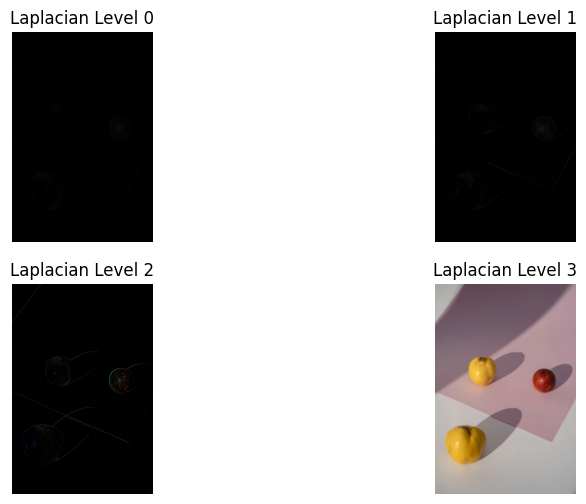

In [6]:
plt.figure(figsize=(10,6))
for i in range(len(L)):
    plt.subplot(2,2,i+1)
    plt.imshow(cv2.normalize(L[i], None, 0, 255, cv2.NORM_MINMAX))
    plt.title(f"Laplacian Level {i}")
    plt.axis("off")
plt.show()


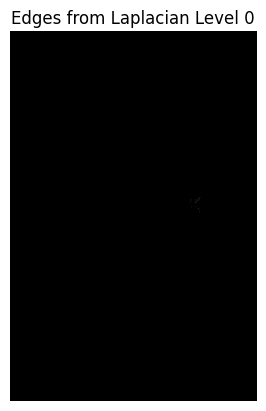

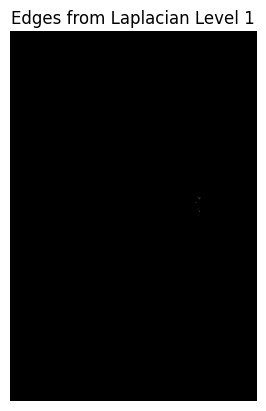

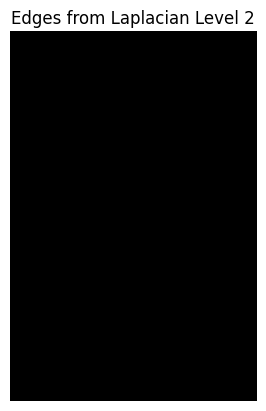

In [7]:
for i, im in enumerate(L[:-1]):
    gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 100, 200)

    plt.figure()
    plt.imshow(edges, cmap='gray')
    plt.title(f"Edges from Laplacian Level {i}")
    plt.axis("off")
    plt.show()
